In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

Using TensorFlow backend.


In [3]:
names=['URL','Category']
df=pd.read_csv('../input/URL Classification.csv',names=names, na_filter=False)
df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]
dt=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)
df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


Text(0, 0.5, 'Total Number Of Individual Category for Testing')

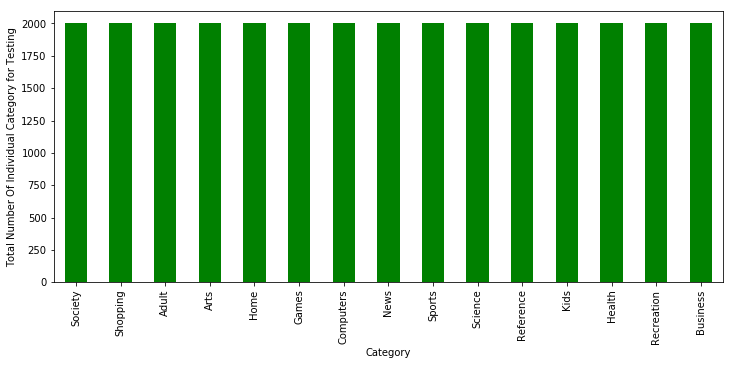

In [4]:
dt.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

Text(0, 0.5, 'Total Number Of Individual Category for Training')

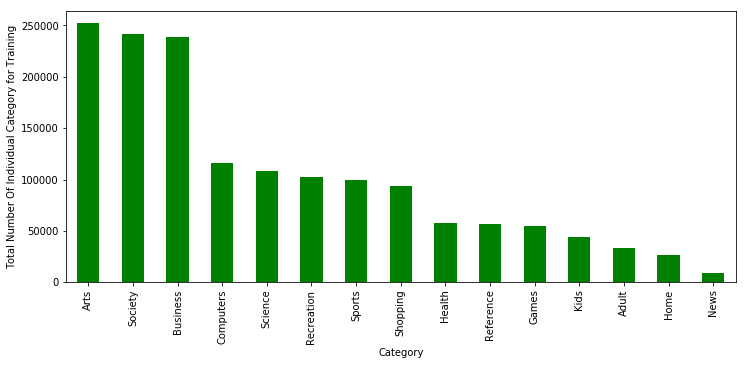

In [5]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

In [6]:
X_train=df['URL']
y_train=df['Category']
print(X_train)
X_train.shape

1                           http://www.liquidgeneration.com/
2001              http://www.loony-archivist.com/ptcarchive/
2002       http://www.angelfire.com/bc/jojosworld/voyager...
2003           http://www.fortunecity.com/athena/satin/2089/
2004               http://www.geocities.com/angelina_vansen/
2005       http://www.chantico.com/alastor/fanfic/voyager...
2006       http://www.angelfire.com/trek/craters0/index.html
2007                 http://www.angelfire.com/trek/khylaren/
2008                     http://kimbo_stv_fanfic.tripod.com/
2009                     http://www.geocities.com/wonkots42/
2010                   http://members.door.net/jlf/other.htm
2011       http://www.ringsurf.com/netring?ring=pkslash;a...
2012       http://www.ringsurf.com/netring?ring=stvoy;act...
2013                        http://www.siubhan.com/list.html
2014       http://www.ringsurf.com/netring?ring=cpslash;a...
2015                 http://e.webring.com/hub?ring=treksmutu
2016          http://c.w

(1532979,)

In [7]:
X_test=dt['URL']
y_test=dt['Category']
print(X_test)
X_test.shape

2                                http://www.onlineanime.org/
3          http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...
4                                 http://www.galeon.com/kmh/
5                                http://www.fanworkrecs.com/
6                                 http://www.animehouse.com/
7                 http://www2.117.ne.jp/~mb1996ax/enadc.html
8            http://archive.rhps.org/fritters/yui/index.html
9                             http://www.freecartoonsex.com/
10                                   http://www.cutepet.org/
11                            http://www.taremeparadise.com/
12         http://www.internetdump.com/users/pornographit...
13                                   http://darkkaminari.net
14                     http://www.iei.net/~bkos1/velneko.htm
15                http://www9.kinghost.com/fetish/hentaibee/
16                               http://www.jasonmeador.com/
17           http://www.geocities.com/kaseychan17/index.html
18         http://www.an

(30000,)

In [8]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LinearSVC())])
text_clf = text_clf.fit(X_train, y_train)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf__C': [0.1, 1,10,100]}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [14]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
y_pred=gs_clf.predict(X_test)
print(y_pred)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

['Society' 'Arts' 'Adult' ... 'Arts' 'Business' 'Business']


(0.7524116601300256, 0.4715, 0.4960220413225663, None)

In [15]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

       Adult     0.9170    0.1270    0.2231      2000
        Arts     0.3276    0.7855    0.4623      2000
    Business     0.1808    0.9610    0.3044      2000
   Computers     0.6749    0.3000    0.4154      2000
       Games     0.8964    0.3245    0.4765      2000
      Health     0.9640    0.3745    0.5394      2000
        Home     0.9528    0.4040    0.5674      2000
        Kids     0.8643    0.2930    0.4376      2000
        News     0.9917    0.1195    0.2133      2000
  Recreation     0.8891    0.4970    0.6376      2000
   Reference     0.7309    0.5160    0.6049      2000
     Science     0.8179    0.7680    0.7922      2000
    Shopping     0.9689    0.8555    0.9087      2000
     Society     0.1616    0.2330    0.1909      2000
      Sports     0.9483    0.5140    0.6667      2000

   micro avg     0.4715    0.4715    0.4715     30000
   macro avg     0.7524    0.4715    0.4960     30000
weighted avg     0.7524   

In [16]:
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,y_pred))

Naive Bayes Test Accuracy =  0.4715
